# VERIFIER SI DRIFT FONCTION LINEAIRE EST RAISONNABLE !!!

# VERIFIER QPLOT SUR MODEL DE REG

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob,os
import pandas as pd
import arviz as az
import statsmodels.api as sm
import warnings 
warnings.simplefilter('ignore')#removes deprecation warnings
plt.style.use('seaborn-ticks')

RTdata = pd.read_csv('DDM/dataHDDM_rt.csv')
PMTdata = pd.read_csv('DDM/dataHDDM_pmt.csv')

# Recovering regression HDDM fits

In [2]:
RTstats = pd.read_csv('DDM/RT_M13_stats.csv', index_col=0)
RTtraces = pd.read_csv('DDM/RT_M13_traces.csv', index_col=0)

PMTstats = pd.read_csv('DDM/PMT_M13_stats.csv', index_col=0)
PMTtraces = pd.read_csv('DDM/PMT_M13_traces.csv', index_col=0)

RTstats_reg = pd.read_csv('DDM/RT_reg_stats.csv', index_col=0)
RTtraces_reg = pd.read_csv('DDM/RT_reg_traces.csv', index_col=0)

PMTstats_reg = pd.read_csv('DDM/PMT_reg_stats.csv', index_col=0)
PMTtraces_reg = pd.read_csv('DDM/PMT_reg_traces.csv', index_col=0)

#Applying invlogit on starting point to recover original scale
def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))

RTtraces_reg["z_Intercept"] = inv_logit(RTtraces_reg["z_Intercept_trans"].values)
RTtraces_reg["z_FC"] = inv_logit(RTtraces_reg["z_Intercept_trans"].values + RTtraces_reg["z_FC"].values/2) - inv_logit(RTtraces_reg["z_Intercept_trans"].values - RTtraces_reg["z_FC"].values/2)

PMTtraces_reg["z_Intercept"] = inv_logit(PMTtraces_reg["z_Intercept_trans"].values)
PMTtraces_reg["z_FC"] = inv_logit(PMTtraces_reg["z_Intercept_trans"].values + PMTtraces_reg["z_FC"].values/2) - inv_logit(PMTtraces_reg["z_Intercept_trans"].values - PMTtraces_reg["z_FC"].values/2)

# Summary table for RT

In [3]:
parameters = ["v_Intercept",'v_contrast','a_Intercept','a_SAT','a_FC','a_SAT:FC','z_Intercept','z_FC','t_Intercept','t_SAT','t_FC','t_contrast','t_SAT:FC','t_SAT:contrast','t_FC:contrast','t_SAT:FC:contrast']

summary_df_RT = pd.DataFrame()

for v in parameters:
    summary_df_RT = summary_df_RT.append(RTstats_reg[RTstats_reg.index.str.contains(v+"$")])

In [4]:
summary_df_RT


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_Intercept,-1.786266,0.130588,-2.051200,-1.867279,-1.785660,-1.701347,-1.526461,0.001725
v_contrast,1.770480,0.155942,1.462891,1.668423,1.769056,1.871884,2.080796,0.002475
a_Intercept,1.084023,0.030913,1.025651,1.063214,1.083514,1.103344,1.147187,0.000461
a_SAT,-0.325381,0.036920,-0.399958,-0.349180,-0.325751,-0.301188,-0.252071,0.000518
a_FC,-0.059106,0.039903,-0.138874,-0.084497,-0.059541,-0.033278,0.020278,0.000708
a_SAT:FC,0.032257,0.041592,-0.050224,0.005680,0.031985,0.059483,0.113230,0.000686
z_Intercept,0.504125,0.013501,0.477406,0.495202,0.504138,0.513125,0.531008,0.000283
z_FC,0.019632,0.011491,-0.002957,0.012326,0.019538,0.026993,0.042455,0.000160
t_Intercept,0.414557,0.012184,0.391176,0.406464,0.414217,0.422416,0.439543,0.000138
t_SAT,-0.077666,0.014448,-0.106209,-0.086901,-0.077608,-0.068405,-0.048990,0.000175


## Table of the effects

In [5]:
parameters = ["v_Intercept",'v_contrast','a_Intercept','a_SAT','a_FC','a_SAT:FC','z_Intercept','z_FC','t_Intercept','t_SAT','t_FC','t_contrast','t_SAT:FC','t_SAT:contrast','t_FC:contrast','t_SAT:FC:contrast']

RTtraces_reg_eff = RTtraces_reg

RTtraces_reg_eff['a_FC:Speed'] = RTtraces_reg_eff["a_FC"] + RTtraces_reg_eff['a_SAT:FC']

RTtraces_reg['t_FC:Speed'] = RTtraces_reg_eff["t_FC"] + RTtraces_reg_eff['t_SAT:FC']
RTtraces_reg_eff['t_contrast:Speed'] = RTtraces_reg_eff["t_contrast"] + RTtraces_reg_eff['t_SAT:contrast']
RTtraces_reg_eff['t_FC:contrast:Speed'] = RTtraces_reg_eff["t_FC:contrast"] + RTtraces_reg_eff['t_SAT:FC:contrast']

name,mean,cri = [],[],[]
for variable in ["v_Intercept",'v_contrast','a_Intercept','a_SAT','a_FC','a_FC:Speed','z_Intercept','z_FC','t_Intercept','t_SAT','t_FC','t_contrast','t_FC:Speed','t_contrast:Speed','t_FC:contrast','t_FC:contrast:Speed','t_SAT:FC','t_SAT:contrast','t_SAT:FC:contrast','a_SAT:FC']:
    name.append(variable)
    mean.append(np.mean(RTtraces_reg_eff[variable]))
    cri.append(az.hdi(RTtraces_reg_eff[variable].values, hdi_prob=0.95))
    
summary_eff_RT = pd.DataFrame({'name':name, 'mean':mean, 'cri':cri})
summary_eff_RT[['2.5','97.5']] = pd.DataFrame(summary_eff_RT.cri.tolist(),
                                 columns = ['2.5','97.5'])
del summary_eff_RT['cri']

In [6]:
summary_eff_RT

,name,mean,2.5,97.5
0,v_Intercept,-1.786266,-2.034900,-1.512530
1,v_contrast,1.770480,1.461011,2.077890
2,a_Intercept,1.084023,1.023803,1.145113
3,a_SAT,-0.325381,-0.397292,-0.250594
4,a_FC,-0.059106,-0.140776,0.018263
5,a_FC:Speed,-0.026850,-0.129826,0.084853
6,z_Intercept,0.503828,0.477043,0.529711
7,z_FC,0.004904,-0.000877,0.010429
8,t_Intercept,0.414557,0.390958,0.439167
9,t_SAT,-0.077666,-0.106148,-0.048953


# Summary table for PMT

In [7]:
parameters = ["v_Intercept",'v_contrast','a_Intercept','a_SAT','a_FC','a_SAT:FC','z_Intercept','z_FC','t_Intercept','t_SAT','t_FC','t_contrast','t_SAT:FC','t_SAT:contrast','t_FC:contrast','t_SAT:FC:contrast']

summary_df_PMT = pd.DataFrame()

for v in parameters:
    summary_df_PMT = summary_df_PMT.append(PMTstats_reg[PMTstats_reg.index.str.contains(v+"$")])

In [8]:
summary_df_PMT


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_Intercept,-1.911095,0.142002,-2.190213,-2.002893,-1.911397,-1.820352,-1.623930,0.002187
v_contrast,1.900822,0.174136,1.557386,1.787554,1.898841,2.014108,2.248785,0.002395
a_Intercept,1.045742,0.029411,0.989776,1.026828,1.044878,1.064298,1.106178,0.000425
a_SAT,-0.301251,0.039714,-0.381053,-0.327099,-0.301232,-0.275535,-0.223590,0.000472
a_FC,-0.167555,0.045330,-0.257796,-0.197528,-0.167618,-0.138056,-0.077362,0.000742
a_SAT:FC,0.096803,0.043446,0.011032,0.068499,0.097227,0.124749,0.183221,0.000710
z_Intercept,0.491079,0.012267,0.467242,0.482773,0.491140,0.499221,0.514729,0.000236
z_FC,0.007143,0.008566,-0.010162,0.001691,0.007140,0.012672,0.023881,0.000118
t_Intercept,0.301204,0.010754,0.280482,0.294112,0.300848,0.307800,0.323346,0.000160
t_SAT,-0.050457,0.013784,-0.077817,-0.059221,-0.050367,-0.041795,-0.022809,0.000161


## Table of the effects

In [9]:
parameters = ["v_Intercept",'v_contrast','a_Intercept','a_SAT','a_FC','a_SAT:FC','z_Intercept','z_FC','t_Intercept','t_SAT','t_FC','t_contrast','t_SAT:FC','t_SAT:contrast','t_FC:contrast','t_SAT:FC:contrast']

PMTtraces_reg_eff = PMTtraces_reg

PMTtraces_reg_eff['a_FC:Speed'] = PMTtraces_reg_eff["a_FC"] + PMTtraces_reg_eff['a_SAT:FC']

PMTtraces_reg['t_FC:Speed'] = PMTtraces_reg_eff["t_FC"] + PMTtraces_reg_eff['t_SAT:FC']
PMTtraces_reg_eff['t_contrast:Speed'] = PMTtraces_reg_eff["t_contrast"] + PMTtraces_reg_eff['t_SAT:contrast']
PMTtraces_reg_eff['t_FC:contrast:Speed'] = PMTtraces_reg_eff["t_FC:contrast"] + PMTtraces_reg_eff['t_SAT:FC:contrast']

name,mean,cri = [],[],[]
for variable in ["v_Intercept",'v_contrast','a_Intercept','a_SAT','a_FC','a_FC:Speed','z_Intercept','z_FC','t_Intercept','t_SAT','t_FC','t_contrast','t_FC:Speed','t_contrast:Speed','t_FC:contrast','t_FC:contrast:Speed','t_SAT:FC','t_SAT:contrast','t_SAT:FC:contrast','a_SAT:FC']:
    name.append(variable)
    mean.append(np.mean(PMTtraces_reg_eff[variable]))
    cri.append(az.hdi(PMTtraces_reg_eff[variable].values, hdi_prob=0.95))
    
summary_eff_PMT = pd.DataFrame({'name':name, 'mean':mean, 'cri':cri})
summary_eff_PMT[['2.5','97.5']] = pd.DataFrame(summary_eff_PMT.cri.tolist(),
                                 columns = ['2.5','97.5'])
del summary_eff_PMT['cri']

In [10]:
summary_eff_PMT

,name,mean,2.5,97.5
0,v_Intercept,-1.911095,-2.187918,-1.623351
1,v_contrast,1.900822,1.548837,2.234604
2,a_Intercept,1.045742,0.988551,1.104328
3,a_SAT,-0.301251,-0.379189,-0.222014
4,a_FC,-0.167555,-0.258063,-0.078443
5,a_FC:Speed,-0.070752,-0.186398,0.051363
6,z_Intercept,0.490841,0.466907,0.514834
7,z_FC,0.001784,-0.002290,0.006170
8,t_Intercept,0.301204,0.280008,0.322755
9,t_SAT,-0.050457,-0.077673,-0.022784


# Factor plot on boundaries

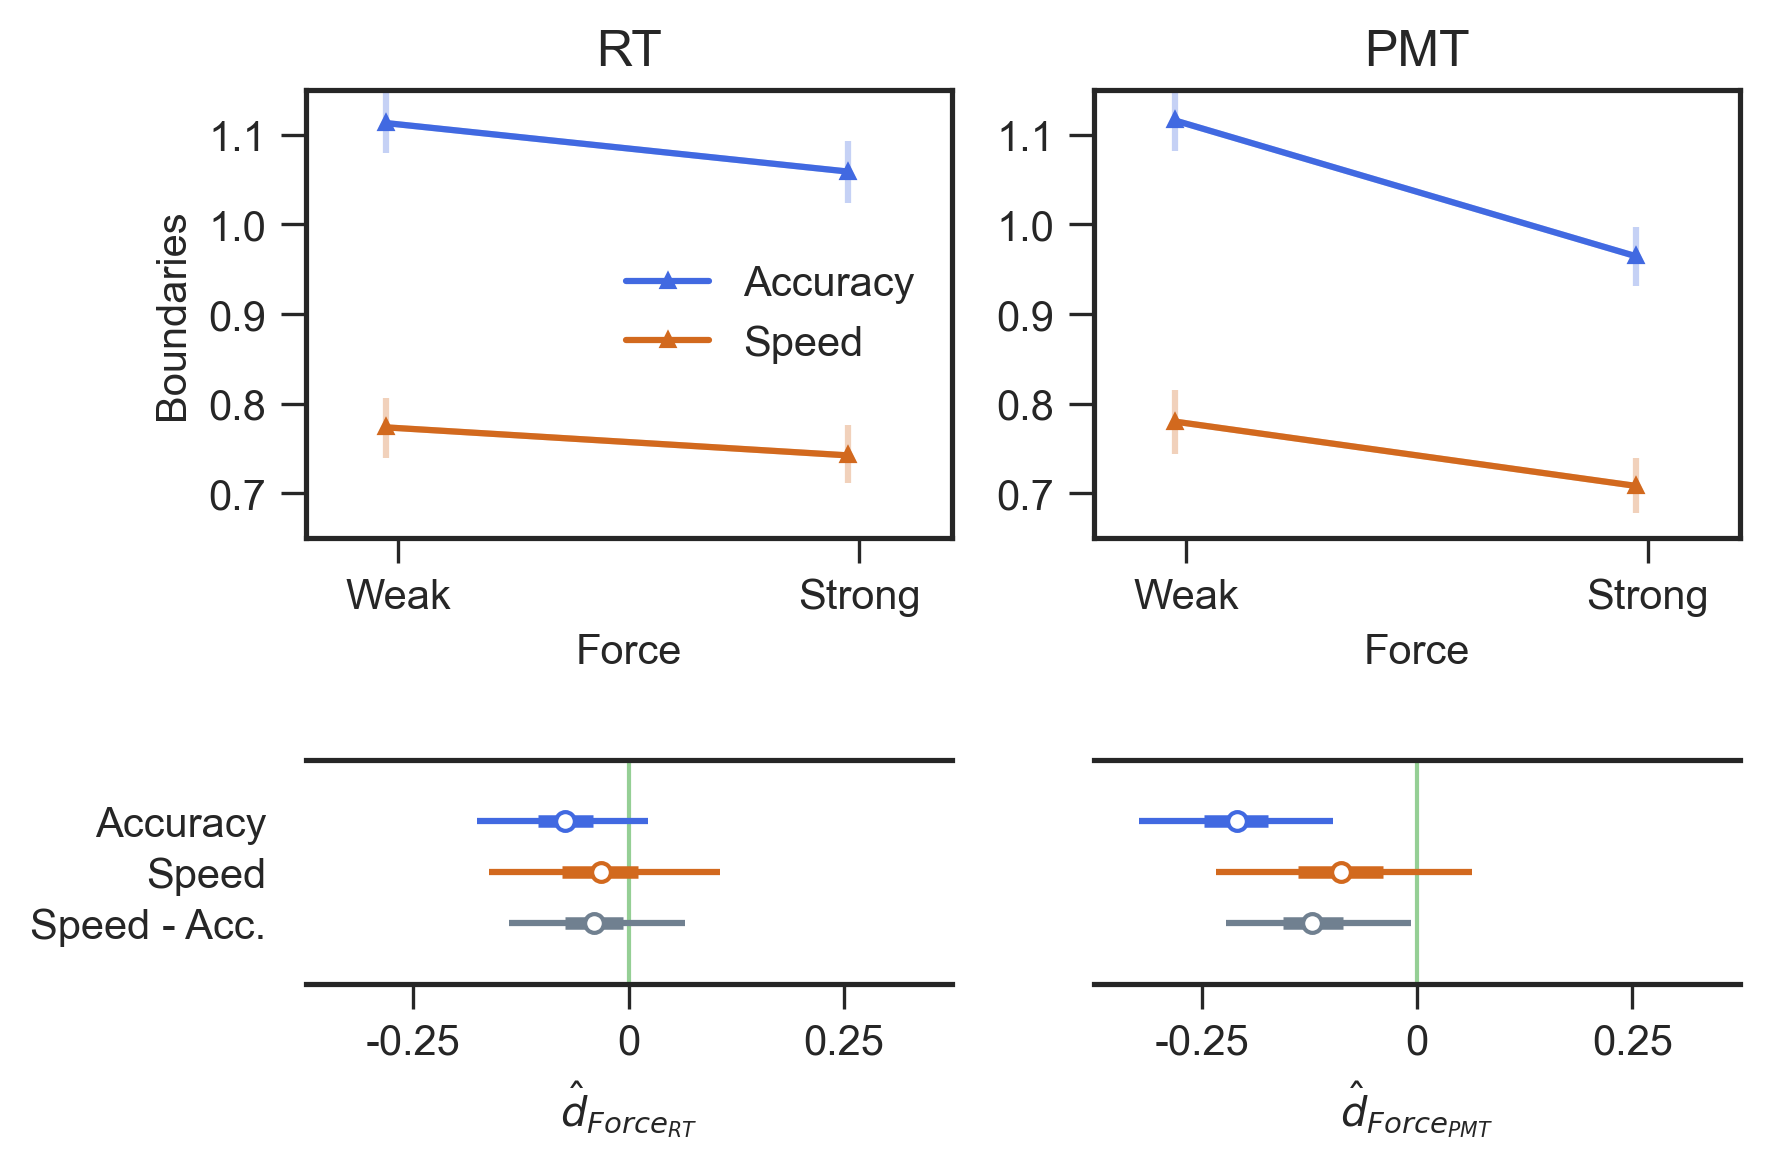

In [36]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
def factorplot(F1, F2, plot_obj, label,c,ls='-',jitter=-.025):
    m_acc, m_spd =  np.mean(F1),np.mean(F2)
    b_acc, u_acc = az.hpd(F1.values, .65)
    b_spd, u_spd = az.hpd(F2.values, .65)

    plot_obj.plot(np.array([1,2])+jitter, [m_acc, m_spd],
             ls=ls, marker="^", c=c, label=label, markersize=3)
    plot_obj.errorbar(np.array([1,2])+jitter, [m_acc, m_spd],
             yerr = np.array([np.abs(m_acc-np.asarray([b_acc, u_acc])),np.abs(m_spd-np.asarray([b_spd, u_spd]))]),
             ls=ls, marker="^", c=c, alpha=.3, markersize=3)



fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         height_ratios=[1, .5])

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])


factorplot(RTtraces["a(low.Accuracy)"], RTtraces["a(high.Accuracy)"], ax0, "Accuracy",'royalblue')
factorplot(RTtraces["a(low.Speed)"], RTtraces["a(high.Speed)"], ax0, "Speed",'chocolate')
factorplot(PMTtraces["a(low.Accuracy)"], PMTtraces["a(high.Accuracy)"], ax1, "PMT",'royalblue')
factorplot(PMTtraces["a(low.Speed)"], PMTtraces["a(high.Speed)"], ax1, "PMT",'chocolate')

ax0.legend()
ax0.set_ylim(0.65, 1.15)
ax1.set_ylim(0.65, 1.15)

#RTtraces_reg["a_FC"].plot(kind='density', color='purple', label='RT',ax=ax2)
#PMTtraces_reg["a_FC"].plot(kind='density', color='indianred',label='PMT', ax=ax3)

RTtraces_reg["a_FC_spd_ms"] = RTtraces_reg["a_FC"] + RTtraces_reg["a_SAT:FC"]
PMTtraces_reg["a_FC_spd_ms"] = PMTtraces_reg["a_FC"] + PMTtraces_reg["a_SAT:FC"]

#RTtraces_reg["a_FC_spd_ms"].plot(kind='density', color='purple', label='RT',ax=ax2,ls=':')
#PMTtraces_reg["a_FC_spd_ms"].plot(kind='density', color='indianred',label='PMT', ax=ax3,ls=':')

#ax3.vlines(0, ax3.get_ylim()[0],ax3.get_ylim()[1], ls='--', color='k')
#ax2.vlines(0, ax2.get_ylim()[0],ax2.get_ylim()[1], ls='--', color='k')
az.plot_forest([np.array(RTtraces_reg["a_FC"]),np.array(RTtraces_reg["a_FC_spd_ms"]),np.array(RTtraces_reg["a_FC"]) - np.array(RTtraces_reg["a_FC_spd_ms"])], 
               ax=ax2, colors=['royalblue','chocolate','slategray'], hdi_prob=.95, rope=[0,0])
az.plot_forest([np.array(PMTtraces_reg["a_FC"]),np.array(PMTtraces_reg["a_FC_spd_ms"]),np.array(PMTtraces_reg["a_FC"]) - np.array(PMTtraces_reg["a_FC_spd_ms"])], 
               ax=ax3, colors=['royalblue','chocolate','slategray'], hdi_prob=.95, rope=[0,0])

ax0.set_xticks([1,2])
ax0.set_xticklabels(["Weak","Strong"])
ax0.set_xlim(0.8,2.2)
ax1.set_xlim(0.8,2.2)
ax0.set_ylabel('Boundaries')
ax0.set_xlabel('Force')
ax1.set_xticks([1,2])
ax1.set_xticklabels(["Weak","Strong"])
ax3.set_xlim(-0.5,0.5)
ax1.set_xlabel('Force\n')

ax2.set(title="", xlim=(-0.3,0.3),xlabel =r'$\hat{d}_{Force_{RT}}$', yticklabels=["Acc. - Speed","Speed","Accuracy"])
ax3.set(title="", xlim=(-0.3,0.3),xlabel =r'$\hat{d}_{Force_{PMT}}$', yticklabels=["","",""])

ax2.set_yticklabels(["Speed - Acc.","Speed","Accuracy"], fontsize=10)
ax2.set_xticklabels([-.25,-.25,0,.25], fontsize=10)
ax3.set_xticklabels([-.25,-.25,0,.25], fontsize=10)

ax0.set_title('RT')
ax1.set_title('PMT')

plt.tight_layout()
plt.savefig('../a.png', bbox_inches='tight')

plt.show()

## Effect of Force on T0

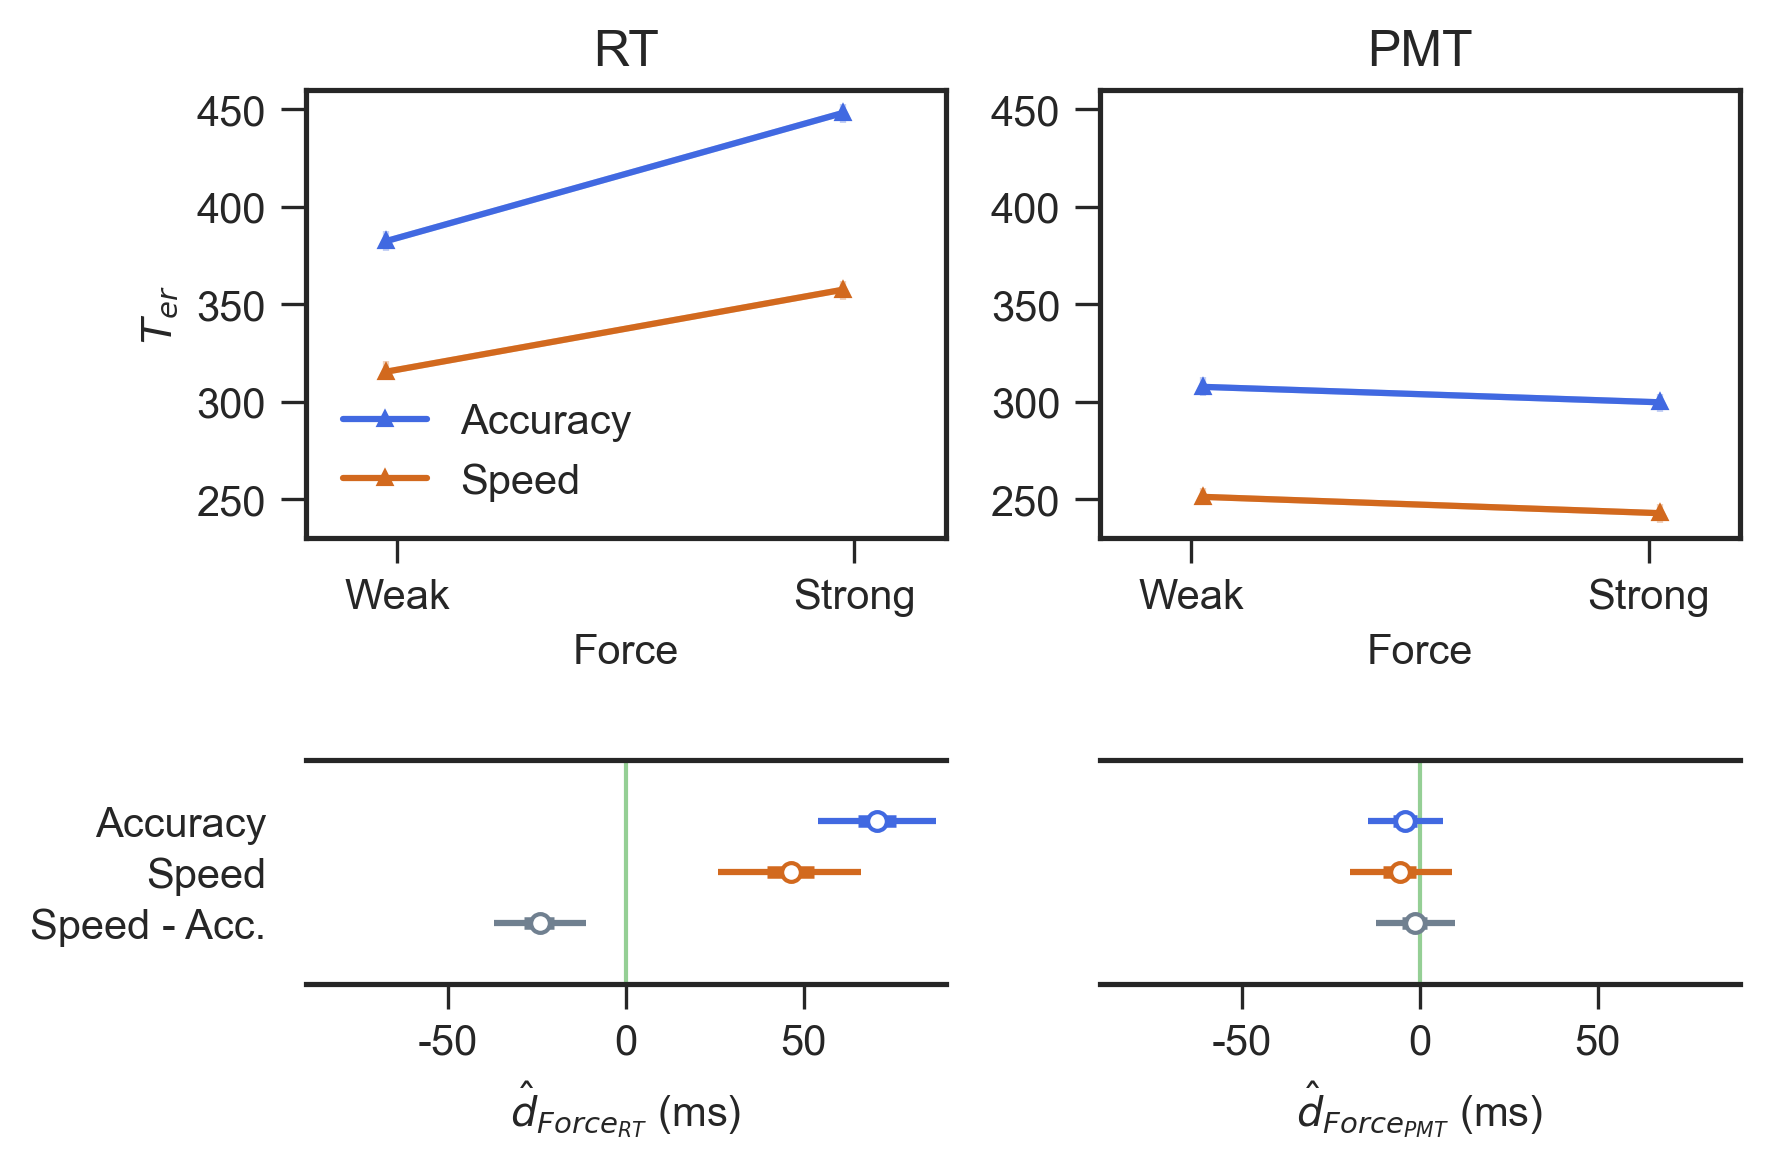

In [35]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         height_ratios=[1, .5])

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])

factorplot(np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(low.Accuracy")],axis=1)*1000, np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(high.Accuracy")],axis=1)*1000, ax0, "Accuracy",'royalblue')
factorplot(np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(low.Speed")],axis=1)*1000, np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(high.Speed")],axis=1)*1000, ax0, "Speed",'chocolate')
factorplot( np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(low.Accuracy")],axis=1)*1000, np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(high.Accuracy")],axis=1)*1000,ax1, "PMT",'royalblue', jitter=.025)
factorplot(np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(low.Speed")],axis=1)*1000, np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(high.Speed")],axis=1)*1000, ax1, "PMT",'chocolate', jitter=.025)

ax0.legend()
#RTtraces_reg["a_FC"].plot(kind='density', color='purple', label='RT',ax=ax2)RTstats_reg
#PMTtraces_reg["a_FC"].plot(kind='density', color='indianred',label='PMT', ax=ax3)

#RTtraces_reg["a_FC_spd_ms"].plot(kind='density', color='purple', label='RT',ax=ax2,ls=':')
#PMTtraces_reg["a_FC_spd_ms"].plot(kind='density', color='indianred',label='PMT', ax=ax3,ls=':')

#ax3.vlines(0, ax3.get_ylim()[0],ax3.get_ylim()[1], ls='--', color='k')
#ax2.vlines(0, ax2.get_ylim()[0],ax2.get_ylim()[1], ls='--', color='k')
az.plot_forest([np.array(RTtraces_reg["t_FC"]*1000),np.array(RTtraces_reg["t_FC:Speed"]*1000),np.array(RTtraces_reg["t_FC:Speed"]*1000) - np.array(RTtraces_reg["t_FC"]*1000)], 
               ax=ax2, colors=['royalblue','chocolate','slategray'], hdi_prob=.95, rope=[0,0])
az.plot_forest([np.array(PMTtraces_reg["t_FC"]*1000),np.array(PMTtraces_reg["t_FC:Speed"]*1000),np.array(PMTtraces_reg["t_FC:Speed"]*1000) - np.array(PMTtraces_reg["t_FC"]*1000)], 
               ax=ax3, colors=['royalblue','chocolate','slategray'], hdi_prob=.95, rope=[0,0])

ax0.set_xticks([1,2])
ax0.set_xticklabels(["Weak","Strong"])
ax0.set_xlim(0.8,2.2)
ax0.set_xlabel('Force')
ax1.set_xticks([1,2])
ax1.set_xticklabels(["Weak","Strong"])
ax1.set_xlim(0.8,2.2)
ax1.set_xlabel('Force\n')

ax2.set(title="", xlim=(-90,90),xlabel =r'$\hat{d}_{Force_{RT}}$ (ms)', yticklabels=["Speed - Acc.","Speed","Accuracy"])
ax3.set(title="", xlim=(-90,90),xlabel =r'$\hat{d}_{Force_{PMT}}$ (ms)', yticklabels=["","",""])

ax0.set_ylabel(r'$T_{er}$')
ax0.set_title('RT')
ax1.set_title('PMT')
ax0.set_ylim(230, 460)
ax1.set_ylim(230, 460)

ax2.set_yticklabels(["Speed - Acc.","Speed","Accuracy"], fontsize=10)
ax2.set_xticklabels([-25,-50,0,50], fontsize=10)
ax3.set_xticklabels([-25,-50,0,50], fontsize=10)

plt.tight_layout()
plt.savefig('../t0.png', bbox_inches='tight')
plt.show()

## Effect of contrast on T0

# Testing the predictions from V1 neurons on the encoding time to the behavioral model

# Comparison to Reynaud et al

In [13]:
#Values recovered from figure 5B in Reynaud et al. 2012 using WebPlotDigitizer (https://apps.automeris.io/wpd/)
reynaud_values = np.asarray([[2.02721224793543,84.6505618336919],
[2.11677302347056,84.4291761241049],
[2.21028991371049,84.2121313107844],
[2.30793571356761,84.0124500825294],
[2.36765002046465,83.9017572277359],
[2.46130710374587,83.6561625273653],
[2.55293967987357,83.4471778305288],
[2.66512238126454,83.1859469594833],
[2.76137362104598,82.9769622626469],
[2.84883294550585,82.7418544787059],
[2.95488290330955,82.5851159560786],
[3.04519161587604,82.3761312592421],
[3.15518497505331,82.088777301092 ],
[3.22377395938466,81.9059156913601],
[3.2903104699427,81.7491771687328 ],
[3.36906488431473,81.5924386461055],
[3.44972165677558,81.3573308621645],
[3.52471342636592,81.1744692524326],
[3.64419220354427,80.860992207178 ],
[3.80436560278044,80.4430228135051],
[3.90801657829937,80.2340381166687],
[4.02747572949523,79.9466841585186],
[4.11062077550938,79.7115763745776],
[4.21357773379385,79.3980993293229],
[4.30981103951279,79.1891146324865],
[4.41298965443993,78.9540068485455],
[4.4992705970852,78.6666528903954 ],
[4.58228819818661,78.457668193559 ],
[4.75805772592861,78.0396987998861],
[4.85106089658437,77.8307141030497],
[4.96720557938538,77.5694832320042],
[5.18000303226216,77.0208984028085],
[5.37295867082832,76.4984366607174],
[5.4898231544599,76.1327134412537 ],
[5.65158599848096,75.7669902217899],
[5.77451076300555,75.4012670023262],
[5.94466219731817,75.0355437828624],
[6.08702063003824,74.6959436505032],
[6.21271510880188,74.3824666052486],
[6.47893595783647,73.6771432534256],
[6.63413327940382,73.2330507726482],
[6.77112540991973,72.9195737273935],
[6.91841230448729,72.5277274208252],
[7.06127468024352,72.2142503755706],
[7.20714752225999,71.7701578947932],
[7.36388181966682,71.4566808495385],
[7.49181279878726,71.0125883687611],
[7.67122126521764,70.6729882364019],
[7.83808722756405,70.2811419298336],
[7.99138784964775,69.8892956232652],
[8.18277349399991,69.5235724038015],
[8.36080889705578,69.0533568359195],
[8.57950571912246,68.6092643551421],
[8.75674239932788,68.1651718743647],
[8.88006058186974,67.9561871775282],
[9.15167255303346,67.3814792612281],
[9.36082755482618,66.9373867804506],
[9.58509024385473,66.4410481254641],
[9.82526273157044,65.9708325575821],
[10.0823165347633,65.448370815491 ],
[10.3460955176834,64.9259090734   ],
[10.6281915308405,64.4034473313089],
[10.824423012089,64.0116010247406 ],
[10.994495193182,63.7448054146537 ],
[11.2036211942716,63.3585238471267],
[11.4807678032599,62.7854673397768],
[11.7342376082407,62.3919696242582],
[11.9895032283738,61.9740002305853],
[12.1977531341473,61.582153924017 ],
[12.5185809277364,61.1219394261264],
[12.7616876816356,60.6678458753576],
[13.0722773706086,60.1441869936748],
[13.3660286922849,59.7796609138028],
[13.7010086261323,59.2310760846072],
[14.1504834578004,58.6302450812024],
[14.5051234276621,58.0816602520068],
[14.9488127122712,57.480829248602 ],
[15.4814589367918,56.8688257286578],
[15.8260552374713,56.4359057644199],
[16.1660671745451,56.0223509567075],
[16.5043000179556,55.6522131512832],
[16.8270134557259,55.3387361060286],
[17.2300611588612,54.9207667123557],
[17.6273188940801,54.4408177503115],
[18.0654405699575,54.0064586636963],
[18.4068039426128,53.6075723765065],
[18.8600095066085,53.144396789246 ],
[19.2287848256245,52.8309197439914],
[19.5837131333604,52.5174426987367],
[20.1175128238478,52.1255963921684],
[20.6437687822181,51.6553808242864],
[21.2900528640457,51.218219045866 ],
[21.667750040282,50.8716882111498 ],
[22.2312469799052,50.5658443498281],
[22.7669394524285,50.1141186851178],
[23.2142786912341,49.7596779003517],
[23.7680942989803,49.3826722461902],
[24.2404978098539,49.1339687099504],
[24.8397883824674,48.7557181556809],
[25.312018888645,48.5473275859467 ],
[25.8204683514824,48.2593795006944],
[26.4307789912999,48.0351018265102],
[27.0718443558928,47.6324254101851],
[27.5992252769266,47.3883082828149],
[28.2620190611422,47.0577174938849],
[28.8191332918398,46.8456962495134],
[29.5044191520826,46.5352557517938],
[30.0929095260698,46.3303698498866],
[30.8013835859485,46.0389170968073],
[31.6066960161294,45.7776862257618],
[32.2244949401387,45.5687015289253],
[32.8116193627166,45.4088595853312],
[33.4964438475263,45.2029783094616],
[34.2617825831016,44.9284670651816],
[35.0818153037592,44.706639654475 ],
[35.8446215879698,44.4454087834295],
[36.7422216701359,44.2103009994885],
[37.2835953115924,44.0974748232483],
[38.2336233453596,43.8184546929202],
[39.402271924861,43.5572238218747 ],
[40.5628211709091,43.3743622121428],
[41.4000797311619,43.1915006024109],
[42.7573174318403,42.9302697313654],
[44.4925791733531,42.6429157732153],
[46.5555171605408,42.3224823399125],
[48.1771513989948,42.0943309440196],
[49.7563980896997,41.8853462471832],
[51.2769937843128,41.7024846374513],
[52.7873880020084,41.4934999406149],
[54.2838109006422,41.310638330883 ],
[56.1837707236977,41.1277767211511],
[57.6767469672112,40.9507591197265],
[59.3504114203913,40.7881765887919],
[61.098408061575,40.6314380661646 ],
[63.0091392602359,40.5253512856181],
[65.792727625234,40.3300109536296 ],
[68.6992306398359,40.1476933104403],
[71.7338134910085,40.0348300075136],
[74.9028990485565,39.8264669867259],
[77.816644094406,39.6387607561915 ],
[81.1484414343572,39.4558991464597],
[84.0787050039145,39.3252837109369],
[88.056044985103,39.1946682754141 ],
[91.6286336132251,39.0901759269959],
[95.3458487340314,39.0379297527868],
[99.1072977138442,38.9856835785777]])

J'ajuste une courbe sur la base de l'équation inversée de Naka-Rushton de Barthélemy, Fleuriet and Masson (2010) sur les données extraite en haut (pour info la structure de ces données c'est [x=contrast, y=temps de réponse des neurones de V1])

In [14]:
import scipy.optimize as sciopt

def Naka_Rushton(par,contrast,maxAmp, maxShift):#Inverted Naka-rushton equation from Barthélemy, Fleuriet and Masson 2010
    c50, slope = par[0],par[1]
    return (maxAmp + maxShift * ((contrast**slope)/((c50**slope)+(contrast**slope))))

def resid(par,x,y):
    ypred = Naka_Rushton(par,x, y[np.where(x == max(x))]-2,(max(y)-min(y))+6)
    return sum((ypred - y)**2)

guess = [10, -1]
contrast = reynaud_values[:,0]
y = reynaud_values[:,1]
NRfit = sciopt.minimize(resid, guess, method='Nelder-Mead', args=(contrast,y))
maxAmp = y[np.where(contrast == max(contrast))]-2#-2 = correction
maxShift = (max(y)-min(y))+6#idem

In [15]:
maxShift

51.664878255114196

In [16]:
maxAmp

array([36.98568358])

Ici je trace l'ajustement entre les données extraites du graphique (en rouge) et le fit fait dans la cellule plus haut (bleu). Pour info j'ai du jouer un peu avec l'amplitude max et le shift max, à mon avis c'est lié à un biais dans l'extraction des données...

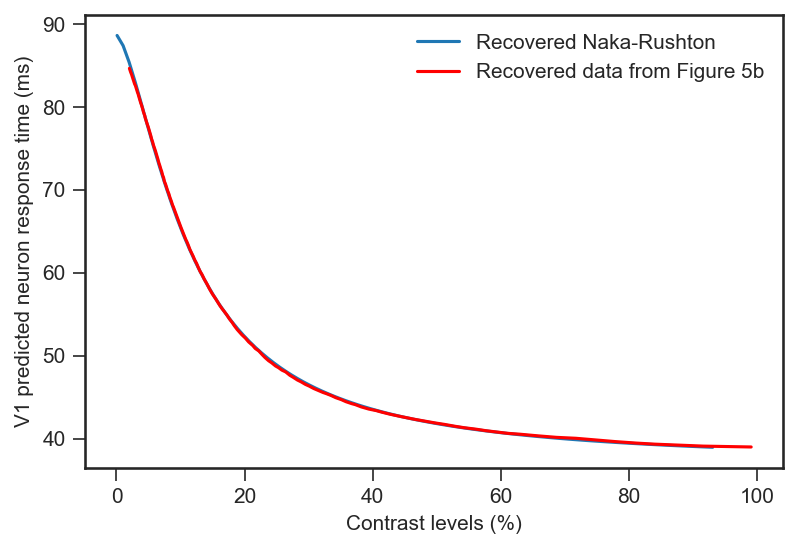

In [17]:
plt.figure(dpi=150)
plt.plot(np.linspace(0.1,93.1,100), Naka_Rushton(par=NRfit.x, maxAmp = maxAmp, maxShift = maxShift,
                                                contrast=np.linspace(0.1,93.1,100)), label='Recovered Naka-Rushton')
plt.plot(reynaud_values[:,0],reynaud_values[:,1], c="r", label='Recovered data from Figure 5b')
plt.xlabel('Contrast levels (%)')
plt.ylabel('V1 predicted neuron response time (ms)')
plt.legend();

L'ajustement paraît très bon, je considère donc qu'on a bien récupéré les valeurs de fit initiales (c50 et slope) :

In [18]:
print('c50 = %f, slope = %f' %(NRfit.x[0],NRfit.x[1]))

c50 = 11.421586, slope = -1.540047


Je récupère donc les prédictions de latences visuelles pour les niveaux de contraste utilisés dans note expérience (de 23% à 93%). Au passage si vous regardez la figure précédente vous pouvez voir qu'on aurait du sélectionner des niveaux de contraste plus faible (< 20%)... On aurait eu une plus grosse taille d'effet sur les latences visuelles ! 

In [19]:
predicted_V1 = Naka_Rushton(par=NRfit.x, maxAmp = maxAmp, maxShift=maxShift,
                                                contrast=np.linspace(23,93,100))

Predictions from V1

In [20]:
#### Prédictions sur V1
#Je récupère les prédictions pour les 6 niveaux de contraste utilisés dans l'expérience :
prediction_V1_points = Naka_Rushton(par=NRfit.x, maxAmp = maxAmp, maxShift=maxShift,
                                                contrast=np.linspace(23,93,6))/1000
# Je rescale comme dans la formule au dessus :
prediction_V1_points = (prediction_V1_points-np.mean(prediction_V1_points))

Recovering predictions from HDDM regression on NDT

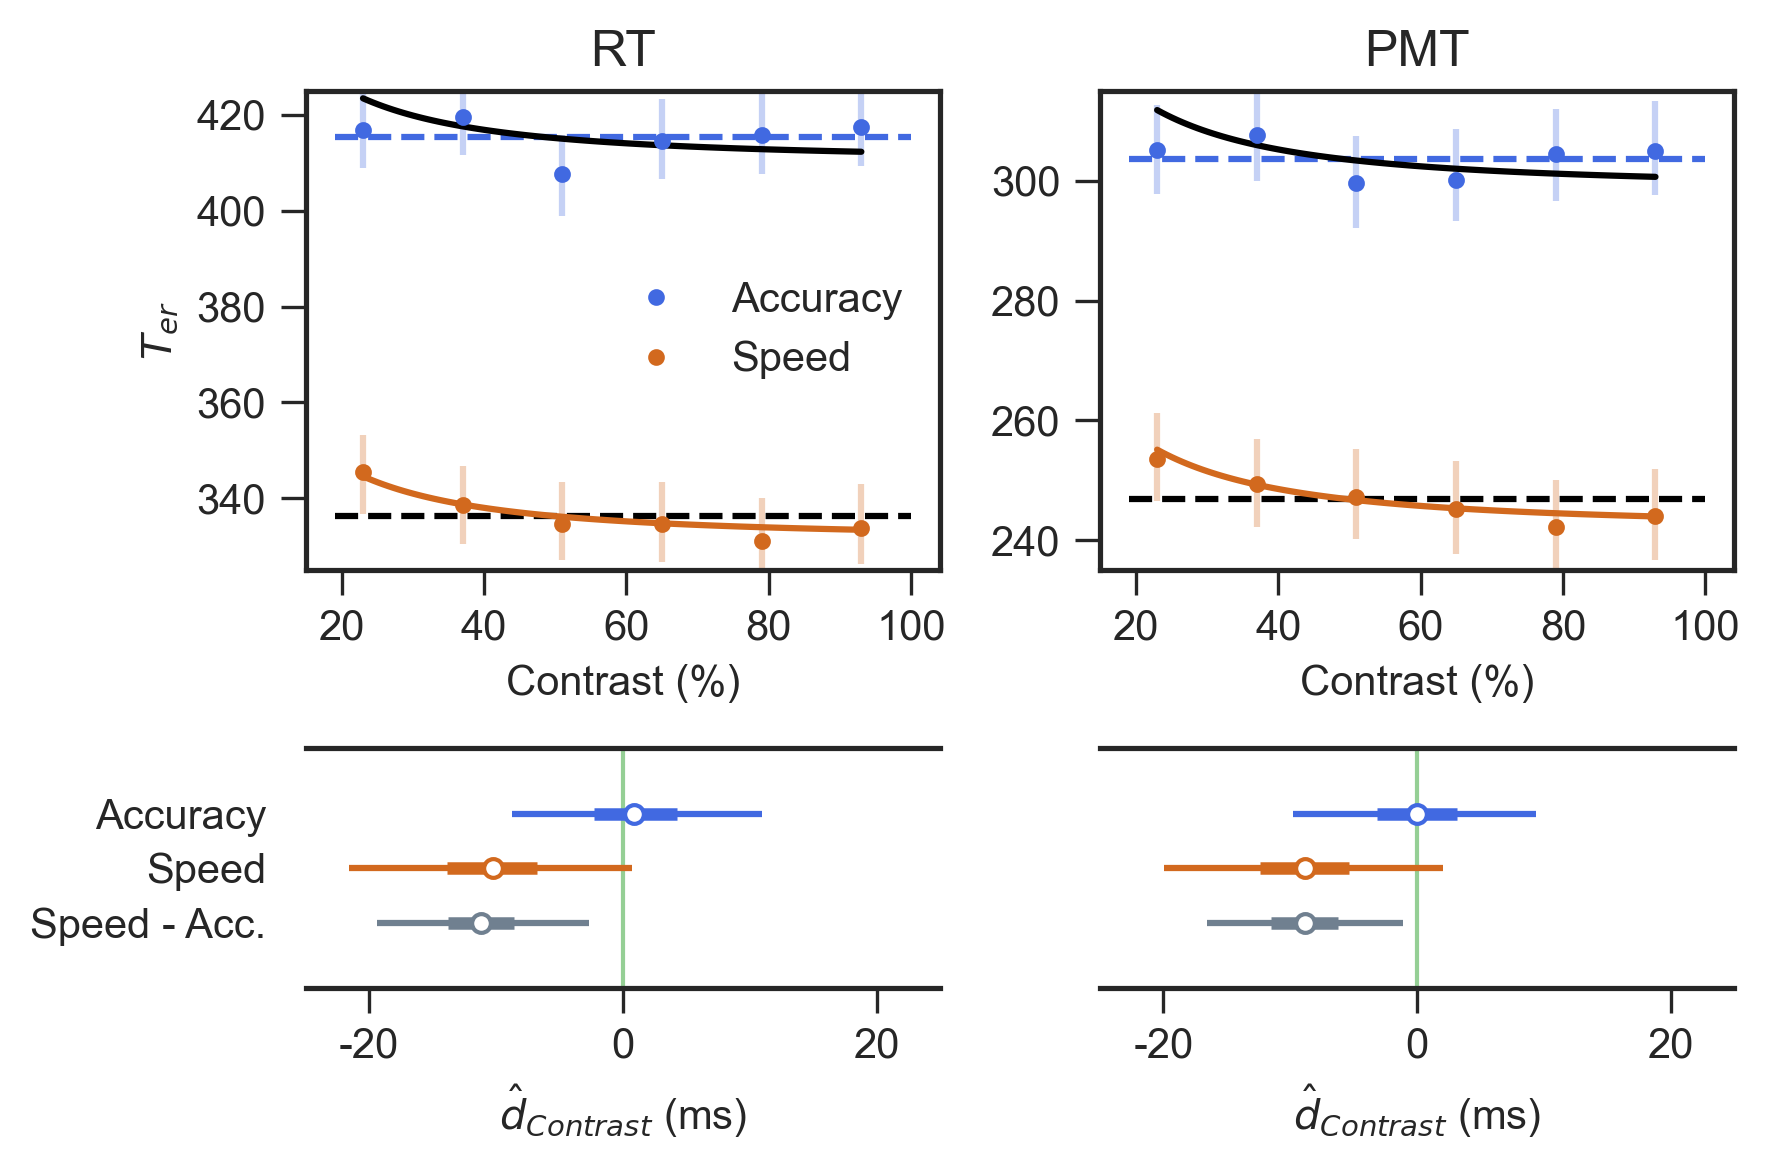

In [30]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

def factorplot(F1, F2, plot_obj, label,c,ls='-'):
    m_acc, m_spd =  np.mean(F1),np.mean(F2)
    b_acc, u_acc = az.hpd(F1.values, .95)
    b_spd, u_spd = az.hpd(F2.values, .95)

    plot_obj.plot([1.02,2.02], [m_acc, m_spd],
             ls=ls, marker="^", c=c, label=label, alpha=.3)


fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         height_ratios=[2, 1])

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])


un,deux,trois,quatre,cinq,six = np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.1")],axis=1), np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.2")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.3")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.4")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.5")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="royalblue", label='Accuracy')
ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="royalblue", label='', alpha=.3)
ax0.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='royalblue')
ax0.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="k")

RTtraces_reg["t_contrast_ms"] = RTtraces_reg["t_contrast"]*1000
################################""################################"################################"################################"


un,deux,trois,quatre,cinq,six = np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.1")],axis=1), np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.2")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.3")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.4")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.5")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="chocolate", label='Speed')
ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="chocolate", label='', alpha=.3)
ax0.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="chocolate")
ax0.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='k')

RTtraces_reg["t_contrast_spd_ms"] = (RTtraces_reg["t_contrast"] + RTtraces_reg["t_SAT:contrast"])*1000

az.plot_forest([np.array(RTtraces_reg["t_contrast_ms"]),np.array(RTtraces_reg["t_contrast_spd_ms"]),np.array(RTtraces_reg["t_contrast_spd_ms"]) - np.array(RTtraces_reg["t_contrast_ms"])], 
               ax=ax2, colors=['royalblue','chocolate',"slategray"], hdi_prob=.95, rope=[0,0])

ax0.legend()

ax0.set_ylabel(r'$T_{er}$')
ax0.set_xlabel('Contrast')
ax2.set_xlabel('Contrast')

ax0.set_ylim(325, 425)


ax0.set_title('RT')


un,deux,trois,quatre,cinq,six = np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.1")],axis=1), np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.2")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.3")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.4")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.5")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="royalblue", label='PMT')
ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="royalblue", label='PMT', alpha=.3)
ax1.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='royalblue')
ax1.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="k")

PMTtraces_reg["t_contrast_ms"] = PMTtraces_reg["t_contrast"]*1000
################################""################################"################################"################################"


un,deux,trois,quatre,cinq,six = np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.1")],axis=1), np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.2")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.3")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.4")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.5")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="chocolate", label='PMT')
ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="chocolate", label='PMT', alpha=.3)
ax1.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="chocolate")
ax1.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='k')

PMTtraces_reg["t_contrast_spd_ms"] = (PMTtraces_reg["t_contrast"] + PMTtraces_reg["t_SAT:contrast"])*1000

az.plot_forest([np.array(PMTtraces_reg["t_contrast_ms"]),np.array(PMTtraces_reg["t_contrast_spd_ms"]),np.array(PMTtraces_reg["t_contrast_spd_ms"]) - np.array(PMTtraces_reg["t_contrast_ms"]) ], 
               ax=ax3, colors=['royalblue','chocolate',"slategray"], hdi_prob=.95, rope=[0,0])



ax0.set_ylabel(r'$T_{er}$')
ax0.set_xlabel('Contrast (%)')
ax1.set_xlabel('Contrast (%)')

ax1.set_ylim(235, 315)

ax1.set_title('PMT')

ax2.set(title="", xlim=(-25,25),xlabel =r'$\hat{d}_{Contrast}$ (ms)', yticklabels=["Speed - Acc.","Speed","Accuracy"])
ax3.set(title="", xlim=(-25,25),xlabel =r'$\hat{d}_{Contrast}$ (ms)', yticklabels=["","",""])
ax2.set_yticklabels(["Speed - Acc.","Speed","Accuracy"], fontsize=10)
ax2.set_xticklabels([-20,-20,0,20], fontsize=10)
ax3.set_xticklabels([-20,-20,0,20], fontsize=10)

plt.tight_layout()
plt.savefig('../V1DDM.png', bbox_inches='tight')
plt.show()

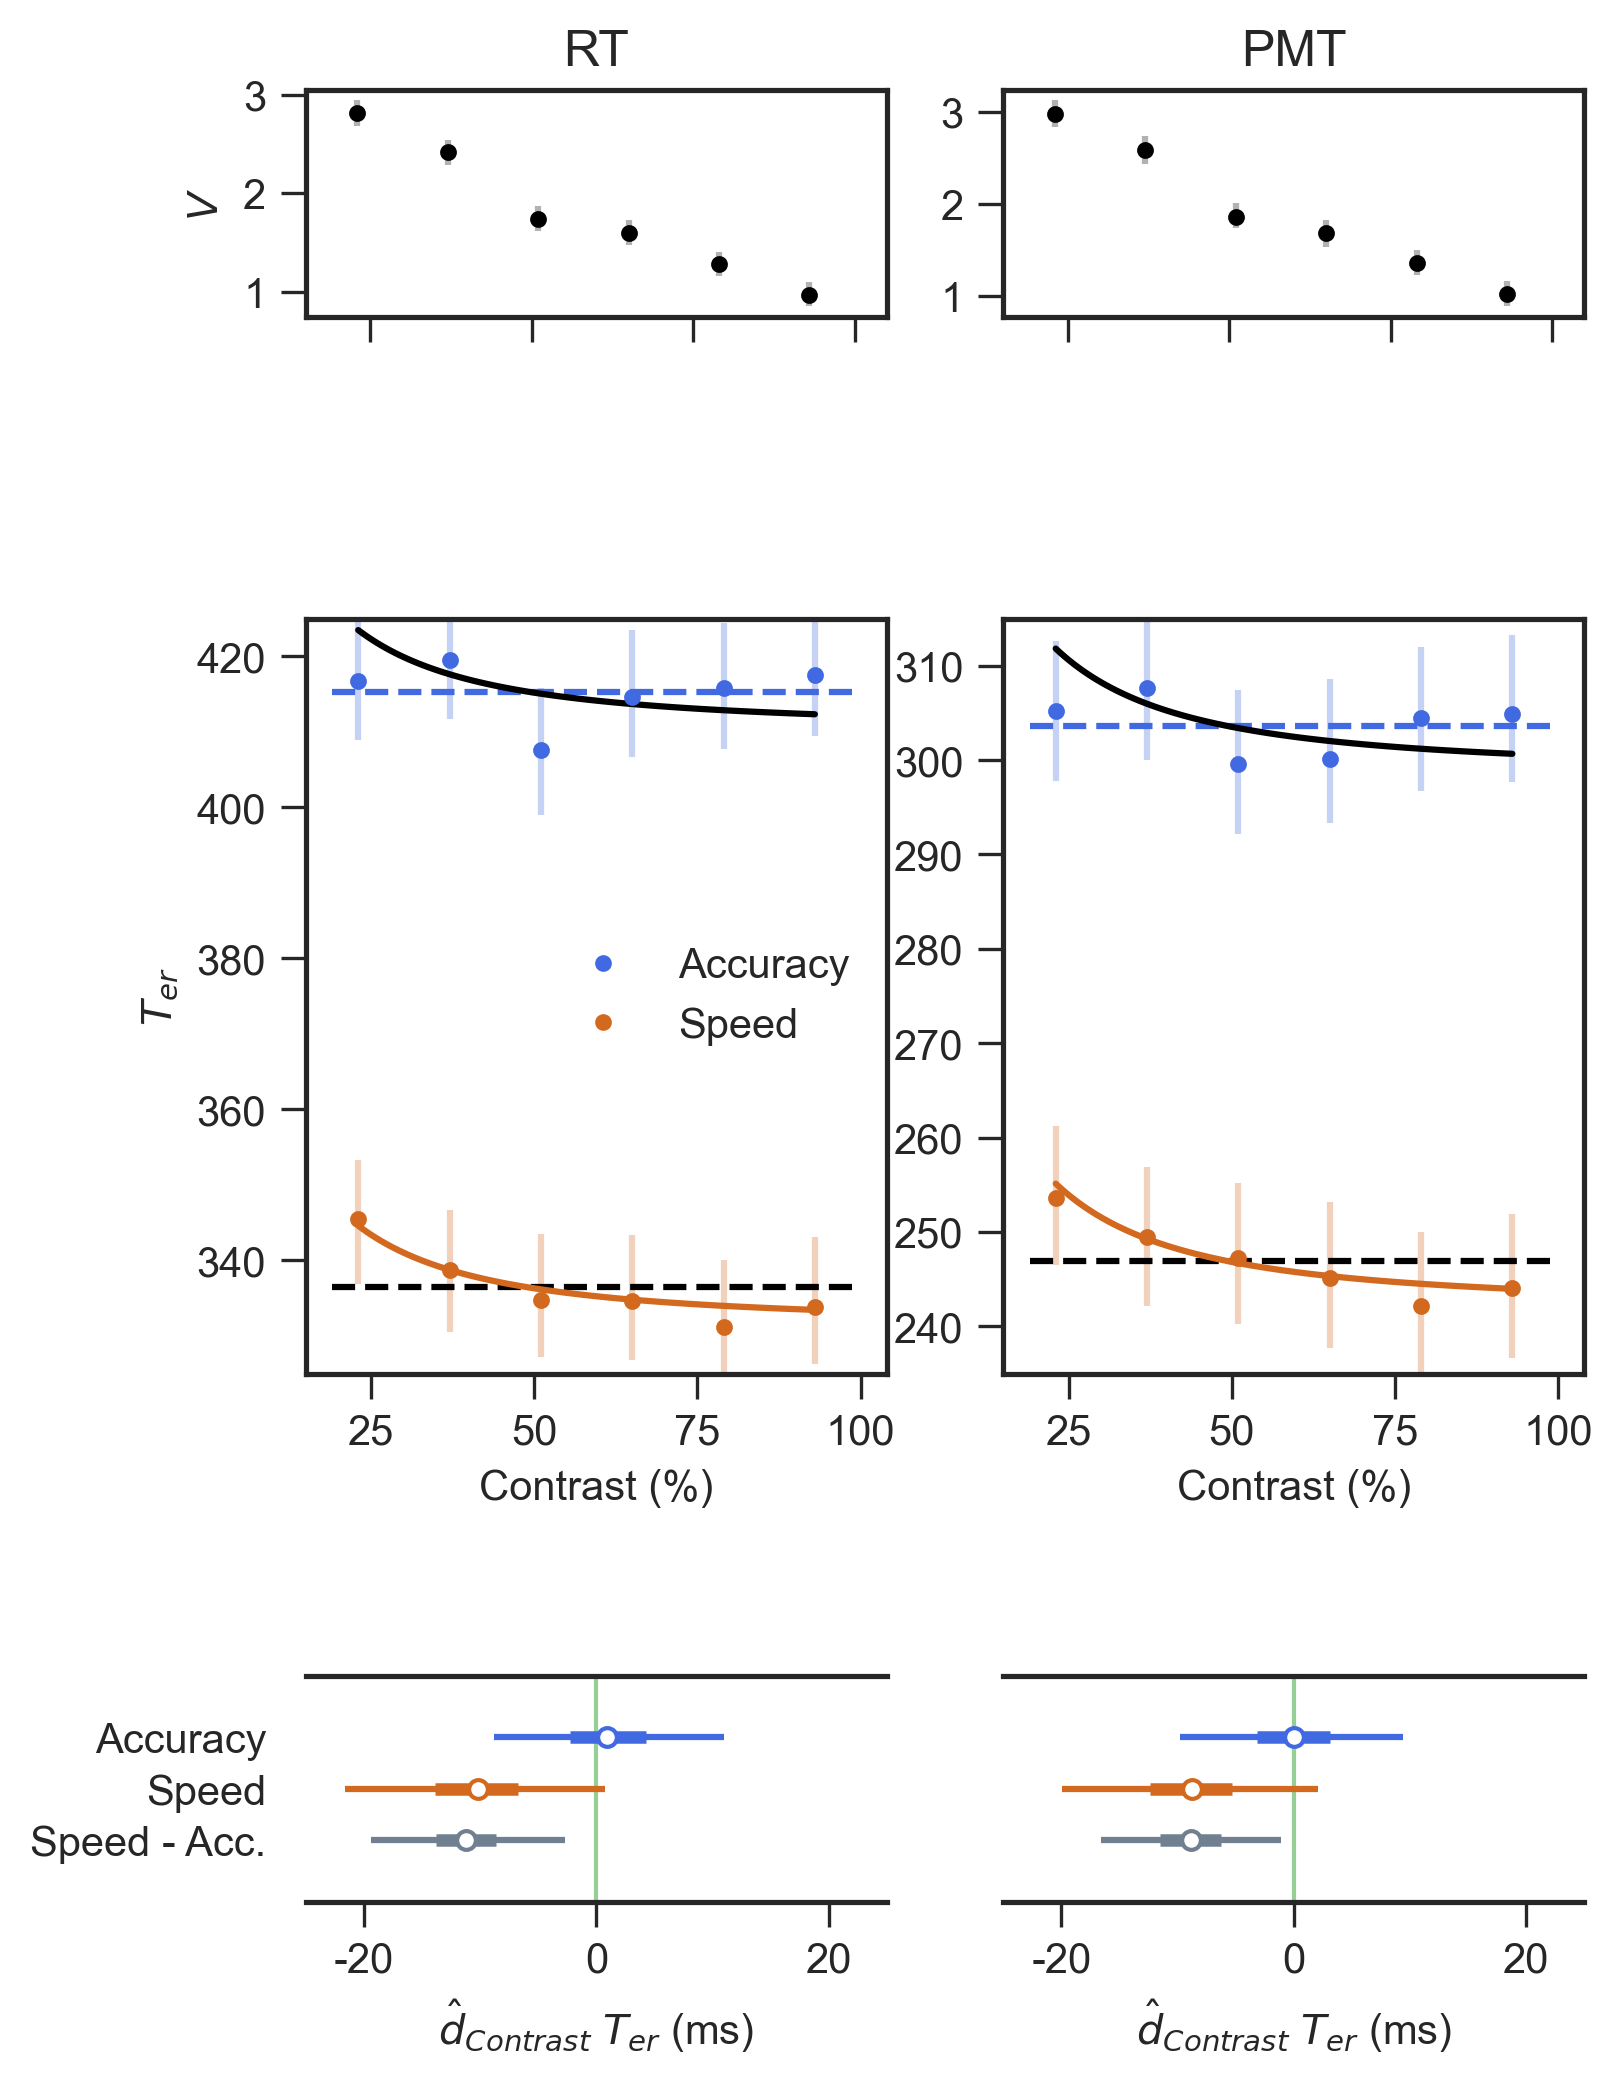

In [32]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

def factorplot(F1, F2, plot_obj, label,c,ls='-'):
    m_acc, m_spd =  np.mean(F1),np.mean(F2)
    b_acc, u_acc = az.hpd(F1.values, .65)
    b_spd, u_spd = az.hpd(F2.values, .65)

    plot_obj.plot([1.02,2.02], [m_acc, m_spd],
             ls=ls, marker="^", c=c, label=label, alpha=.3)


fig = plt.figure(dpi=300, figsize=(5.5,8))
spec = gridspec.GridSpec(ncols=2, nrows=3, hspace=.75,
                         height_ratios=[3, 10, 3])

ax0 = fig.add_subplot(spec[2])
ax1 = fig.add_subplot(spec[3])
ax2 = fig.add_subplot(spec[4])
ax3 = fig.add_subplot(spec[5])
ax4 = fig.add_subplot(spec[0])
ax5 = fig.add_subplot(spec[1])


un,deux,trois,quatre,cinq,six = np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.1")],axis=1), np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.2")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.3")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.4")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.5")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Accuracy.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="royalblue", label='Accuracy')
ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="royalblue", label='', alpha=.3)
ax0.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='royalblue')
ax0.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="k")

################################""################################"################################"################################"

un,deux,trois,quatre,cinq,six = np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.1")],axis=1), np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.2")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.3")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.4")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.5")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("t\(.*.Speed.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="chocolate", label='Speed')
ax0.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="chocolate", label='', alpha=.3)
ax0.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="chocolate")
ax0.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='k')

az.plot_forest([np.array(RTtraces_reg_eff["t_contrast"])*1000,np.array(RTtraces_reg_eff["t_contrast:Speed"])*1000,np.array(RTtraces_reg_eff["t_contrast:Speed"])*1000 - np.array(RTtraces_reg_eff["t_contrast"])*1000], 
               ax=ax2, colors=['royalblue','chocolate',"slategray"], hdi_prob=.95, rope=[0,0])

ax0.legend()

ax0.set_ylabel(r'$T_{er}$')
ax0.set_xlabel('Contrast')
ax2.set_xlabel('Contrast')

ax0.set_ylim(325, 425)


ax4.set_title('RT')


un,deux,trois,quatre,cinq,six = np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.1")],axis=1), np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.2")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.3")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.4")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.5")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Accuracy.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="royalblue", label='PMT')
ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="royalblue", label='PMT', alpha=.3)
ax1.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='royalblue')
ax1.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="k")

################################""################################"################################"################################"


un,deux,trois,quatre,cinq,six = np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.1")],axis=1), np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.2")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.3")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.4")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.5")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("t\(.*.Speed.6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="chocolate", label='PMT')
ax1.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six])*1000,
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))]))*1000,
            fmt='.', c="chocolate", label='PMT', alpha=.3)
ax1.plot(np.linspace(23,93,100), (predicted_V1-np.mean(predicted_V1))+np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,c="chocolate")
ax1.hlines(np.mean(np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]))*1000,19,100,ls='--',color='k')

az.plot_forest([np.array(PMTtraces_reg_eff["t_contrast"])*1000,np.array(PMTtraces_reg_eff["t_contrast:Speed"])*1000,np.array(PMTtraces_reg_eff["t_contrast:Speed"])*1000 - np.array(PMTtraces_reg_eff["t_contrast"])*1000], 
               ax=ax3, colors=['royalblue','chocolate',"slategray"], hdi_prob=.95, rope=[0,0])



ax0.set_ylabel(r'$T_{er}$')
ax0.set_xlabel('Contrast (%)')
ax1.set_xlabel('Contrast (%)')

ax1.set_ylim(235, 315)

ax5.set_title('PMT')

ax2.set(title="", xlim=(-25,25),xlabel =r'$\hat{d}_{Contrast}$ $T_{er}$ (ms)', yticklabels=["Speed - Acc.","Speed","Accuracy"])
ax3.set(title="", xlim=(-25,25),xlabel =r'$\hat{d}_{Contrast}$ $T_{er}$ (ms)', yticklabels=["","",""])
ax2.set_yticklabels(["Speed - Acc.","Speed","Accuracy"], fontsize=10)
ax2.set_xticklabels([-20,-20,0,20], fontsize=10)
ax3.set_xticklabels([-20,-20,0,20], fontsize=10)



un,deux,trois,quatre,cinq,six = np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("v\(1")],axis=1), np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("v\(2")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("v\(3")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("v\(4")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("v\(5")],axis=1),np.mean(RTtraces.iloc[:,RTtraces.columns.str.contains("v\(6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax4.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]),
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="k")
ax4.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]),
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
            fmt='.', c="k", label='', alpha=.3)
ax4.set_ylabel(r'$V$')


un,deux,trois,quatre,cinq,six = np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("v\(1")],axis=1), np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("v\(2")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("v\(3")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("v\(4")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("v\(5")],axis=1),np.mean(PMTtraces.iloc[:,PMTtraces.columns.str.contains("v\(6")],axis=1)
m_un,m_deux,m_trois,m_quatre,m_cinq,m_six = np.mean(un),np.mean(deux),np.mean(trois),np.mean(quatre),np.mean(cinq),np.mean(six)
b_un, u_un = az.hpd(un.values, .65)
b_deux, u_deux = az.hpd(deux.values, .65)
b_trois, u_trois = az.hpd(trois.values, .65)
b_quatre, u_quatre = az.hpd(quatre.values, .65)
b_cinq, u_cinq = az.hpd(cinq.values, .65)
b_six, u_six = az.hpd(six.values, .65)

ax5.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]),
            #yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
             fmt='.', c="k", label='PMT')
ax5.errorbar(np.linspace(23,93,6), np.asarray([m_un,m_deux,m_trois,m_quatre,m_cinq,m_six]),
            yerr = np.transpose(np.array([np.abs(m_un-np.asarray([b_un, u_un])),np.abs(m_deux-np.asarray([b_deux, u_deux])),np.abs(m_trois-np.asarray([b_trois, u_trois])),np.abs(m_quatre-np.asarray([b_quatre, u_quatre])),np.abs(m_cinq-np.asarray([b_cinq, u_cinq])),np.abs(m_six-np.asarray([b_six, u_six]))])),
            fmt='.', c="k", label='PMT', alpha=.3)

ax4.set_xlim(15,105)
ax5.set_xlim(15,105)
ax4.set_xticklabels([])
ax5.set_xticklabels([])
plt.tight_layout()
plt.savefig('../V1DDM.png', bbox_inches='tight')
plt.show()